## Introduction

The topic of day 18 was "Out of this world". I had never worked with any data that were out of this world.

I decided I could see if there are images of Mars, planets etc and I decided to work work with data from Mars and more specifically, the  Mars Orbiter Laser Altimeter (MOLA) data were used.

Since mapping Mars was entirely new to me and not having too much time either, I decided not to have too ambituous goals and follow a tutorial where I thinkered a bit around with the settings. Ultimately, for the first time I decided to work with the Python PyGMT package and I absolutely loved and I used this package also further in the 30DayMapChallenge.

Since this is a completely new package to me, the code and maps are still very simple ...

The code below is based on the following tutorial that I had obtained from EGU 2022:

https://www.generic-mapping-tools.org/egu22pygmt/mars_maps_extended.html

The script below is run in Google Colab.

## Data download

The data were obtained as follows (following the tutorial link given above). These data are already in a .nc format. The resolution of these data but it was good enough to get my hands dirty with the PyGMT package.


In [2]:
# This is from the European Space Agency under ESTEC contract 11369/95/NL/JG(SC) and Centre National D'Etude Spatial and
# is on GitHub.

!wget https://github.com/andrebelem/PlanetaryMaps/raw/v1.0/mola32.nc

--2025-12-09 05:01:43--  https://github.com/andrebelem/PlanetaryMaps/raw/v1.0/mola32.nc
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/andrebelem/PlanetaryMaps/v1.0/mola32.nc [following]
--2025-12-09 05:01:43--  https://media.githubusercontent.com/media/andrebelem/PlanetaryMaps/v1.0/mola32.nc
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 132780052 (127M) [application/octet-stream]
Saving to: ‘mola32.nc’

mola32.nc           100%[===================>] 126.63M  83.3MB/s    in 1.5s    

2025-12-09 05:01:45 (83.3 MB/s) - ‘mola32.nc’ saved [132780052/132780052]



## Installing PyGMT and other Python libraries

In [1]:
# This script is fully obtained from:
# https://www.generic-mapping-tools.org/egu22pygmt/mars_maps_extended.html
# %%script echo skipping

# because I like to enjoy my coffee in silence, it takes time.
# (3 runs averaged 6 minutes to install everything ! keep drinking your coffee)
# comment the %%capture line if you want to see the colab VM working
%%capture
!sudo apt update
!sudo apt upgrade -y
!sudo apt install -y build-essential cmake libcurl4-gnutls-dev libnetcdf-dev gdal-bin libgdal-dev libfftw3-dev libpcre3-dev liblapack-dev libblas-dev libglib2.0-dev ghostscript ghostscript-x graphicsmagick ffmpeg xdg-utils
# clone gmt from source
!git clone --depth 50 https://github.com/GenericMappingTools/gmt
# cmake everything
!cmake /content/gmt
# build and install
!cmake --build . --target install

# and last but not least
!pip install pygmt

# and if you don't believe in it
!gmt --version
!python --version

In [ ]:
!pip install netCDF4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 75.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 79.9 MB/s eta 0:00:00


<frozen posixpath>:82: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)


Importing packages

In [6]:
## import netCDF4
import xarray as xr
import pygmt

Open the Mars dataset:

In [5]:
dset_mars = xr.open_dataset('/content/mola32.nc')
dset_mars

<xarray.Dataset> Size: 133MB
Dimensions:    (latitude: 5760, longitude: 11520)
Coordinates:
  * latitude   (latitude) float32 23kB 89.98 89.95 89.92 ... -89.95 -89.98
  * longitude  (longitude) float32 46kB 0.01562 0.04688 0.07812 ... 360.0 360.0
Data variables:
    alt        (latitude, longitude) int16 133MB ...
Attributes:
    title:    MOLA Topography - 32 pixels/degree
    history:  Built from original MOLA file megt90n000fb.img

In [7]:
# convert from int16 to float
dset_mars_topo = dset_mars.alt.astype(float)

# Set to one degree spacing - as per the tutorial, we can ignore the warnings
dset_mars_topo = pygmt.grdsample(grid=dset_mars_topo,translate=True,spacing=[1,1])

grdsample [WARNING]: (x_max-x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdsample [WARNING]: (y_max-y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdsample (gmtapi_init_grdheader): Please select compatible -R and -I values
grdsample [WARNING]: Output sampling interval in x exceeds input interval and may lead to aliasing.
grdsample [WARNING]: Output sampling interval in y exceeds input interval and may lead to aliasing.


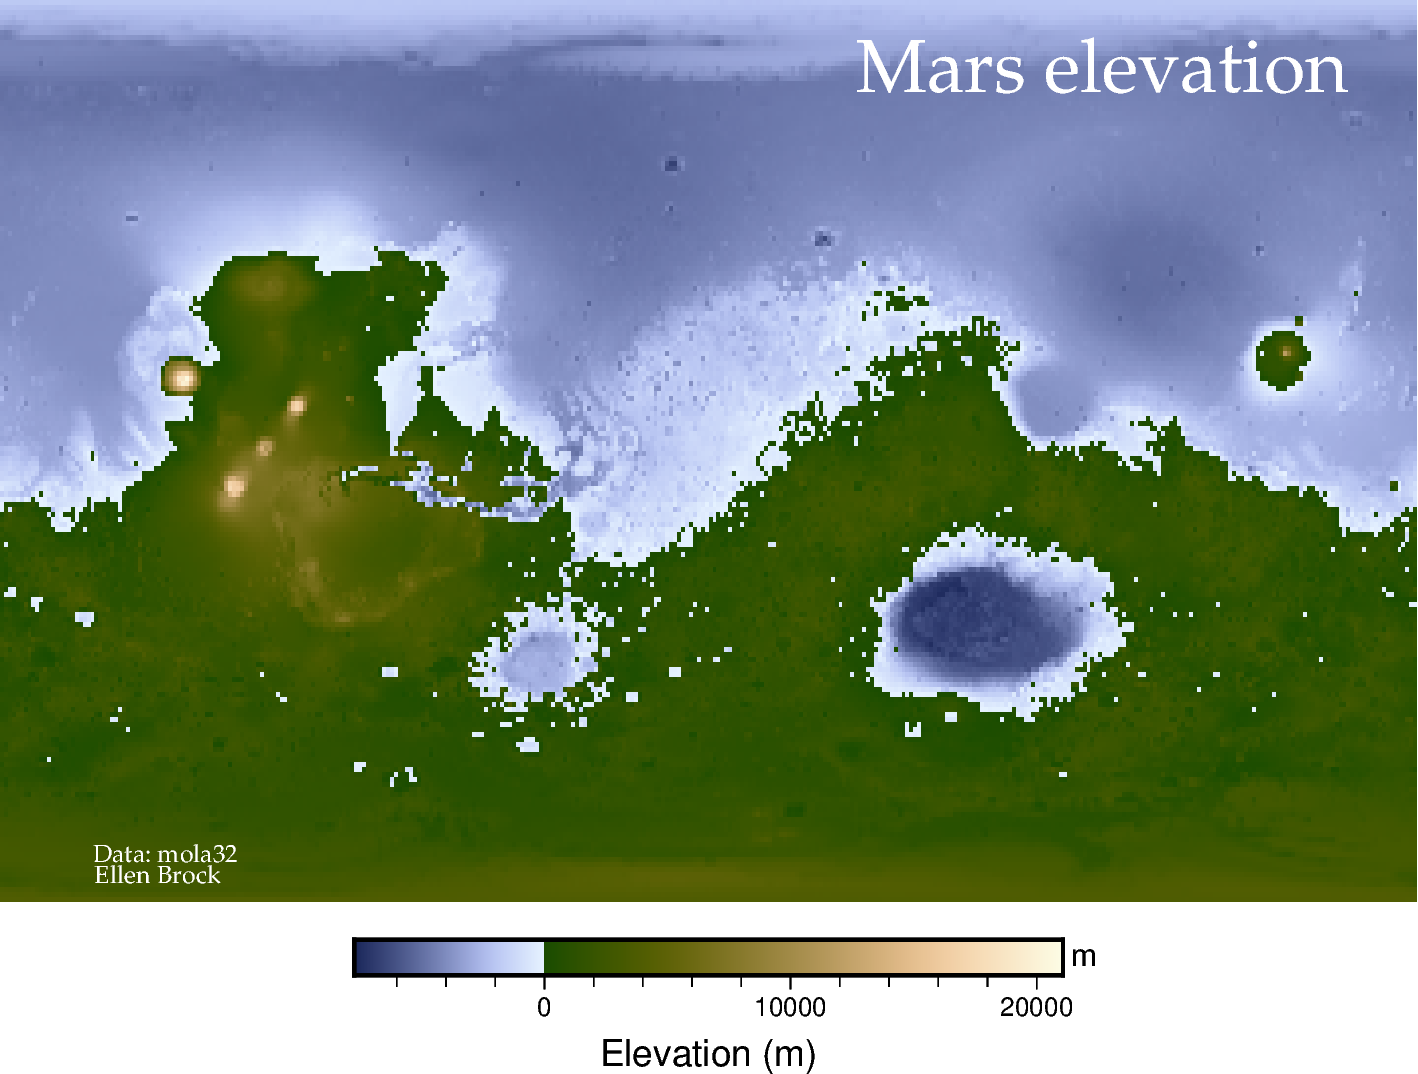

In [9]:
fig = pygmt.Figure()

# Plot
fig.grdimage(
    grid=dset_mars_topo,
    cmap="oleron",              # used a lot for topographic maps
    region="g",                 # Global
    projection="Cyl_stere/0/0/12c"         # Mollweide projection
)

fig.colorbar(
    frame=["x+lElevation (m)", "y+lm"],
    position="JBC+w6c/0.3c+h"   # smaller
)

fig.text(
    x=100,
    y=85,
    text="Mars elevation",
    font="18p,Palatino-Roman,white",
    justify="CT"
)

fig.text(
    x=-140,
    y=-85,
    text="Ellen Brock",
    font="6p,Palatino-Roman,white",
    justify="CT"
)

fig.text(
    x=-138,
    y=-82,
    text="Data: mola32",
    font="6p,Palatino-Roman,white",
    justify="CT"
)


fig.savefig("mars_map.png")

fig.show()


In the next steps, I hope to experiment with 3D and higher resolution data for the MOLA.